<a href="https://colab.research.google.com/github/amexo-git/ML-project/blob/master/potato_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


# Import Libraries

In [ ]:
import os 
import glob as gb
import cv2

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
from PIL import Image

from sklearn.utils import class_weight
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd

from sklearn.utils.class_weight import compute_class_weight
from collections import OrderedDict


In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 50

# Import Data

 File path

In [ ]:
train_dir = "/content/drive/MyDrive/data/PLD_3_Classes_256/Training"
valid_dir = "/content/drive/MyDrive/data/PLD_3_Classes_256/Validation"
test_dir = "/content/drive/MyDrive/data/PLD_3_Classes_256/Testing"


#Feature scaling and Data augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                              horizontal_flip = True, 
                              vertical_flip = True, 
                              rotation_range=0.3
                              )

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')

Found 3261 images belonging to 3 classes.


In [ ]:

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')
     

Found 405 images belonging to 3 classes.


In [ ]:

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')
     

Found 416 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}

# Visualization 

#### Sample images

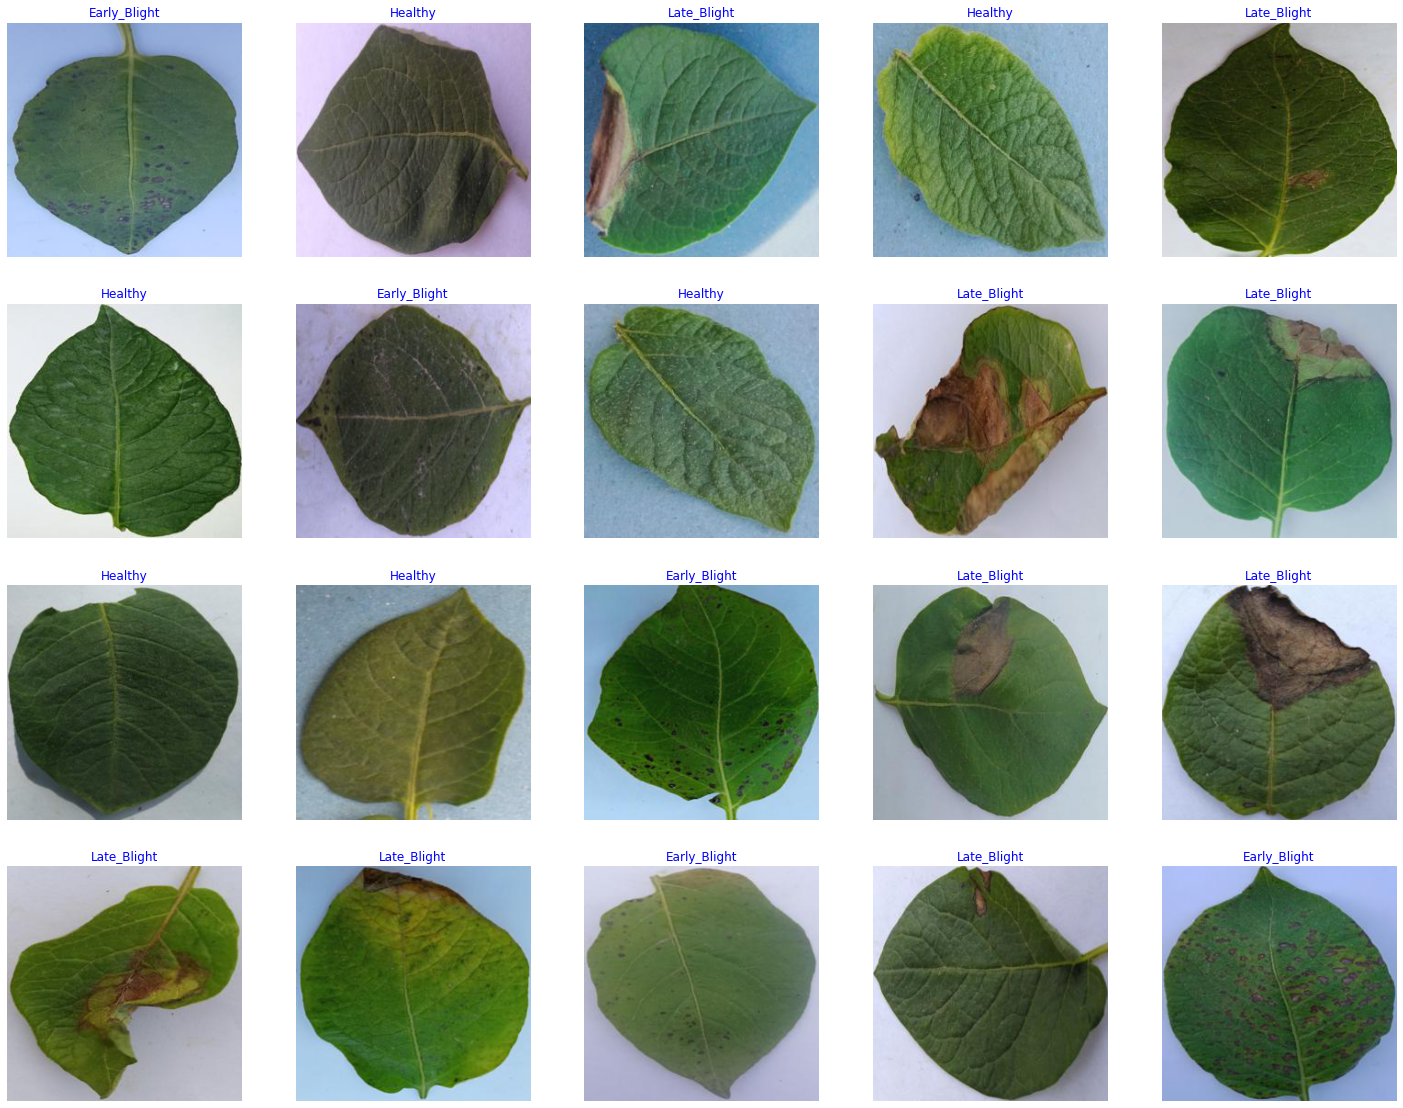

In [ ]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(25, 25))
    length=len(labels)
    if length<20:   #show maximum of 25 images
        r=length
    else:
        r=20
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        # image=images[i] /256      
        plt.imshow(images[i])
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.savefig('sample.png', bbox_inches='tight')
    plt.show()
show_image_samples(train_generator)

#### visualizing each class using bar chart and pie chart 

In [85]:

def bar_count(data,classes,fig_name):
  num_values = []
  unique, counts = np.unique(data, return_counts=True)
  valdict=OrderedDict(zip(unique, counts))
  for i in range(3):
      num_values.append(valdict[i])
  plt.figure(figsize=(30,10))
  x = np.arange(len(num_values))
  xlabel = classes
  plt.bar(x, num_values)
  plt.xticks(x, xlabel)
  plt.savefig(fig_name)
  plt.show()  


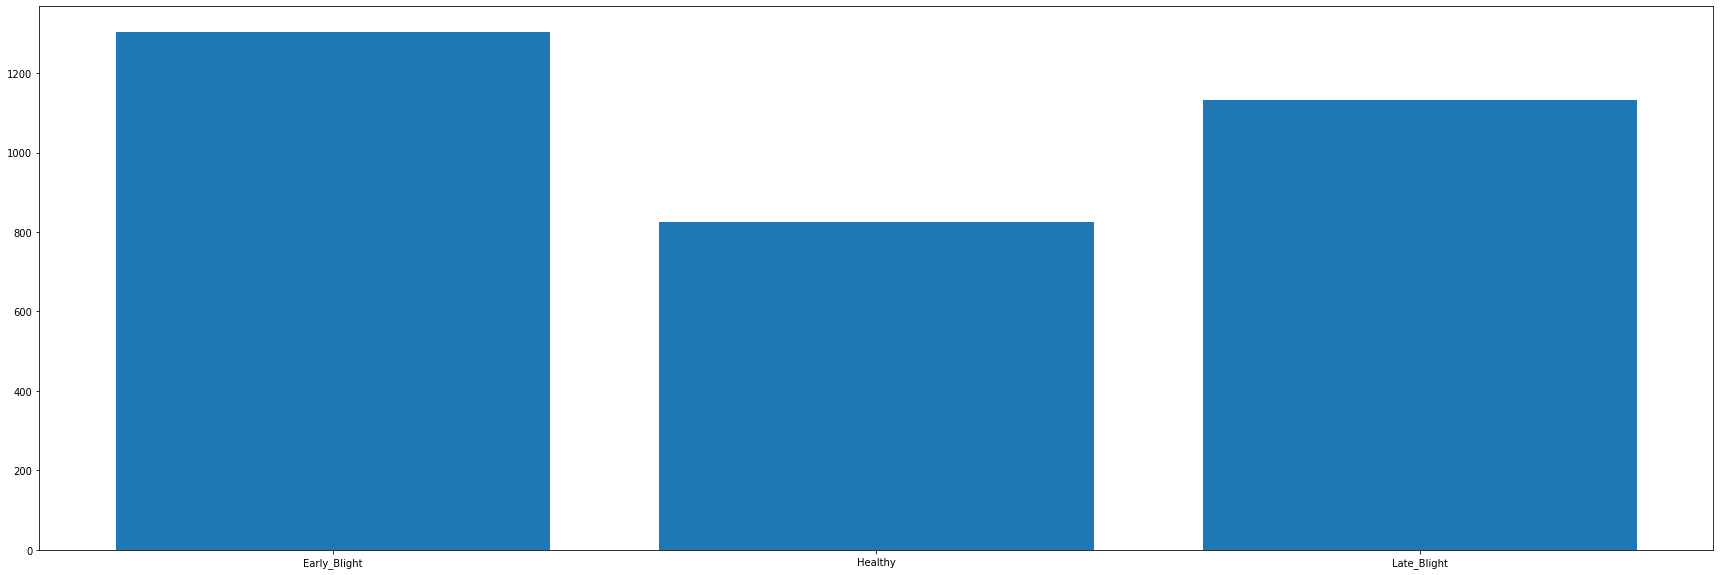

In [86]:
cls_train = train_generator.classes
classes = list(train_generator.class_indices.keys())
train_bar_fig="train_bar_fig.png"
bar_count(cls_train,classes,train_bar_fig)

In [87]:

def pie_count(cls_train,goal_types,pie_fig):
  unique, counts = np.unique(cls_train, return_counts=True)
  goals = [(counts)]
  colors = ['g','r','y']
  plt.pie(goals, labels = goal_types, colors=colors ,shadow = True, explode = (0.05, 0.05, 0.05), autopct = '%1.1f%%')
  plt.axis('equal')
  plt.savefig(pie_fig)
  plt.show()

<ipython-input-87-343849b3b969>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(goals, labels = goal_types, colors=colors ,shadow = True, explode = (0.05, 0.05, 0.05), autopct = '%1.1f%%')


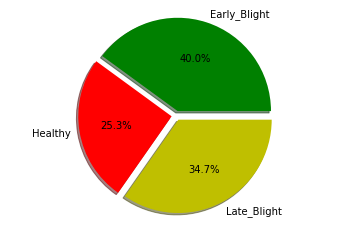

In [88]:
goal_types = list(train_generator.class_indices.keys())
cls_train = train_generator.classes
train_pie_fig="train_pie_fig.png"
pie_count(cls_train, goal_types,train_pie_fig)

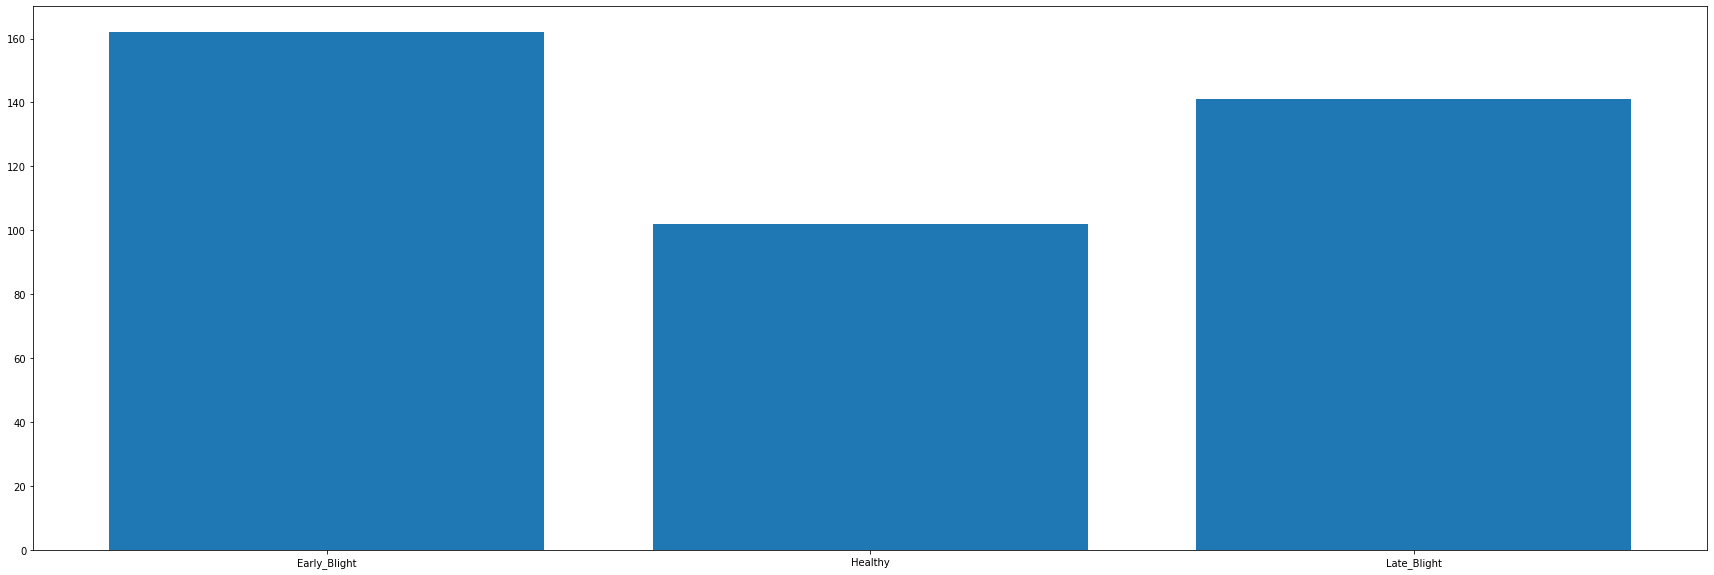

In [89]:
cls_test = test_generator.classes
classes = list(test_generator.class_indices.keys())
test_bar_fig="test_bar_fig.png"
bar_count(cls_test,classes,test_bar_fig)

<ipython-input-87-343849b3b969>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(goals, labels = goal_types, colors=colors ,shadow = True, explode = (0.05, 0.05, 0.05), autopct = '%1.1f%%')


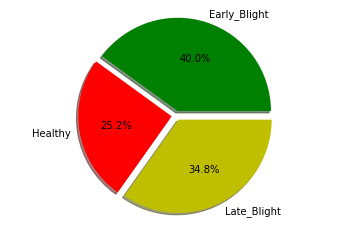

In [90]:
goal_types = list(test_generator.class_indices.keys())
cls_test = test_generator.classes
test_pie_fig="test_pie_fig.png"
pie_count(cls_test, goal_types,test_pie_fig)
     

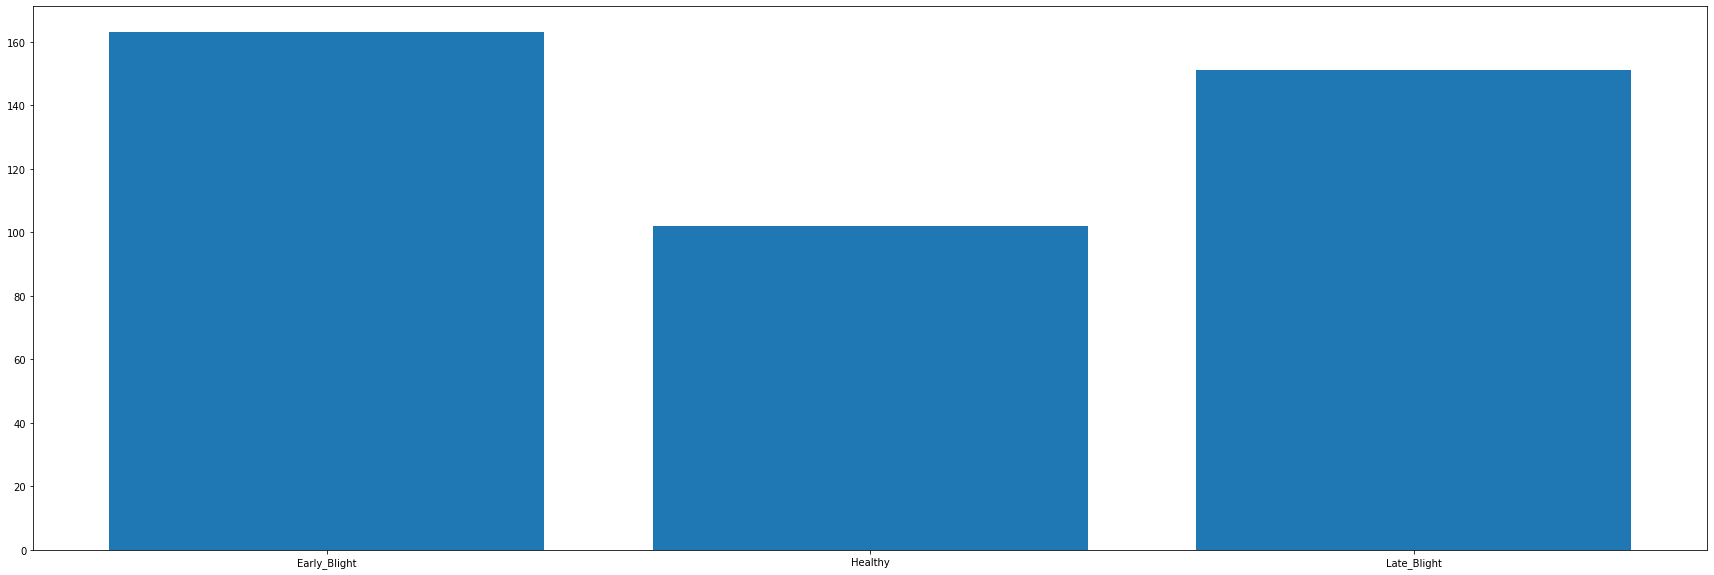

In [91]:
cls_val = val_generator.classes
classes = list(val_generator.class_indices.keys())
val_bar_fig="val_bar_fig.png"
bar_count(cls_val,classes,val_bar_fig)

<ipython-input-87-343849b3b969>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(goals, labels = goal_types, colors=colors ,shadow = True, explode = (0.05, 0.05, 0.05), autopct = '%1.1f%%')


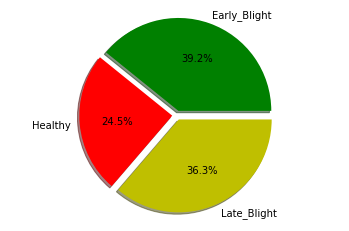

In [92]:
goal_types = list(val_generator.class_indices.keys())
cls_val = val_generator.classes
val_pie_fig="val_pie_fig.png"
pie_count(cls_val, goal_types,val_pie_fig)

#### Data Augmentation Sample

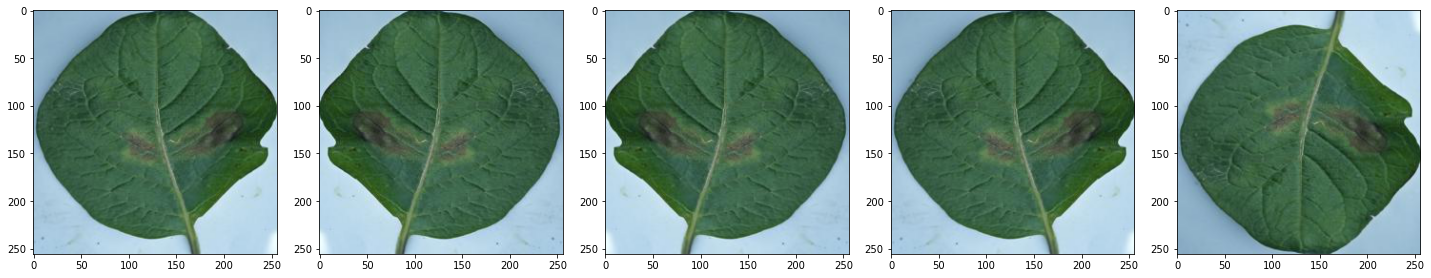

In [93]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.savefig('augment.png', bbox_inches='tight')
    plt.show()
      
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Architecture

In [94]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

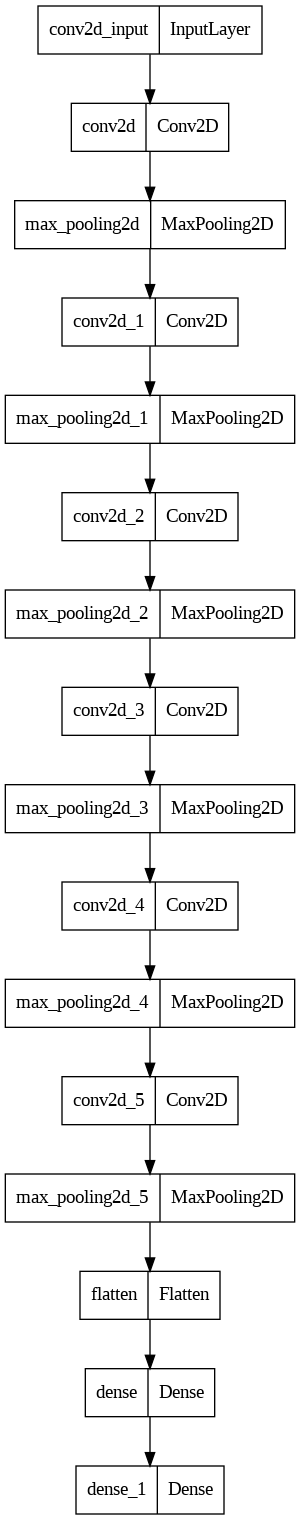

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='architecture.png')

In [ ]:
# Set the loss function and metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

## Trainig models

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=50, 
                    callbacks=[callback])

Epoch 1/50
102/102 [==============================] - 513s 5s/step - loss: 1.0355 - accuracy: 0.4358 - val_loss: 0.9417 - val_accuracy: 0.5333
Epoch 2/50
102/102 [==============================] - 54s 531ms/step - loss: 0.8913 - accuracy: 0.5986 - val_loss: 0.9638 - val_accuracy: 0.5383
Epoch 3/50
102/102 [==============================] - 53s 520ms/step - loss: 0.7823 - accuracy: 0.6903 - val_loss: 0.6476 - val_accuracy: 0.7457
Epoch 4/50
102/102 [==============================] - 53s 519ms/step - loss: 0.5258 - accuracy: 0.7967 - val_loss: 0.6262 - val_accuracy: 0.8049
Epoch 5/50
102/102 [==============================] - 53s 523ms/step - loss: 0.3680 - accuracy: 0.8635 - val_loss: 0.3772 - val_accuracy: 0.8617
Epoch 6/50
102/102 [==============================] - 54s 531ms/step - loss: 0.3152 - accuracy: 0.8807 - val_loss: 0.2296 - val_accuracy: 0.9210
Epoch 7/50
102/102 [==============================] - 53s 523ms/step - loss: 0.2183 - accuracy: 0.9209 - val_loss: 0.2051 - val_accu

### accuracy and losses of the model

In [ ]:
cnn_df = pd.DataFrame(history.history)
cnn_df

,loss,accuracy,val_loss,val_accuracy
0,1.035511,0.435756,0.941743,0.533333
1,0.891282,0.598589,0.963844,0.538272
2,0.782267,0.690279,0.647640,0.745679
3,0.525828,0.796688,0.626223,0.804938
4,0.367965,0.863539,0.377151,0.861728
5,0.315171,0.880711,0.229557,0.920988
6,0.218303,0.920883,0.205095,0.923457
7,0.168577,0.938362,0.220819,0.928395
8,0.148956,0.949402,0.242860,0.920988
9,0.167597,0.942349,0.169220,0.955556


In [ ]:
cnn_df.to_csv("Alz-cnn.csv")

## Visualization of model output

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


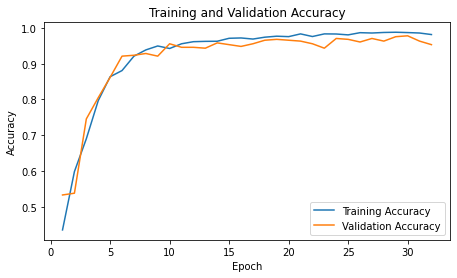

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('accuracy.png', bbox_inches='tight')

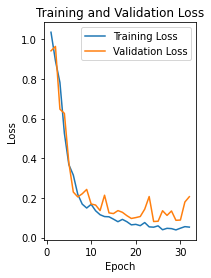

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('loss.png', bbox_inches='tight')
plt.show()

# Evaluation

In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

13/13 [==============================] - 1s 104ms/step - loss: 0.2060 - accuracy: 0.9531
Test loss: 0.20603835582733154
Test accuracy: 0.9530864357948303


In [ ]:
predict=model.predict(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

13/13 [==============================] - 1s 101ms/step


array([0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

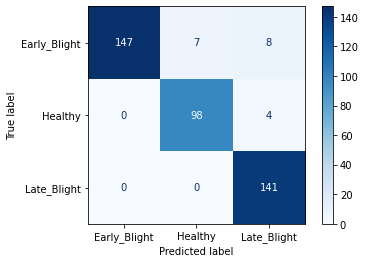

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
import seaborn
labels=['Early_Blight', 'Healthy', 'Late_Blight']

cm = confusion_matrix(test_generator.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.savefig('confusion.png', bbox_inches='tight')
plt.show()

In [ ]:
print(classification_report(test_generator.classes, y_classes))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       162
           1       0.93      0.96      0.95       102
           2       0.92      1.00      0.96       141

    accuracy                           0.95       405
   macro avg       0.95      0.96      0.95       405
weighted avg       0.96      0.95      0.95       405



In [ ]:

img_path_healthy = '/content/drive/MyDrive/data/PLD_3_Classes_256/Testing/Healthy/Healthy_102.jpg'
img_path_early = '/content/drive/MyDrive/data/PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_102.jpg'
img_path_late = '/content/drive/MyDrive/data/PLD_3_Classes_256/Testing/Late_Blight/Late_Blight_1.jpg'

In [ ]:
def evaluation(path):
    img = cv2.imread(path)
    test1_proc = image.load_img(path , target_size=(256,256))
    test1_proc_1 = image.img_to_array(test1_proc)
    t1 = np.expand_dims(test1_proc ,axis=0)
    t1 = t1/255
    pred_classes = model.predict(t1)
    pred = np.argmax(pred_classes ,axis=1)

    plt.subplot(121)
    pic = Image.open(path) 
    plt.xlabel("Original Image")
    plt.imshow(pic)
    
    
    plt.subplot(122)
    
    s1 = pd.Series(pred_classes.ravel() , index = test_generator.class_indices.keys())
    s1.plot(kind = 'bar' ,figsize = (10,5))
    plt.xlabel("prediction")
    for i in test_generator.class_indices:
      plt.savefig(i+'.png')
    plt.show()

    for i in test_generator.class_indices:
        if pred == test_generator.class_indices[i]:
            print("prediction made by model is :" ,i)


1/1 [==============================] - 0s 20ms/step


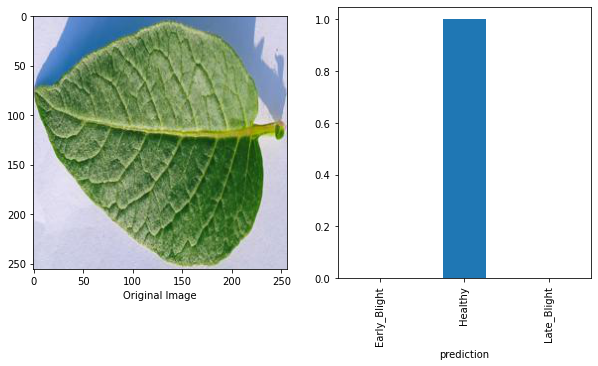

prediction made by model is : Healthy


In [ ]:
evaluation(img_path_healthy)

1/1 [==============================] - 0s 37ms/step


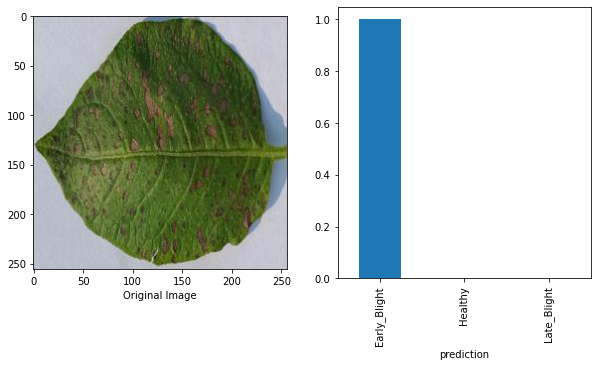

prediction made by model is : Early_Blight


In [ ]:
evaluation(img_path_early)

1/1 [==============================] - 0s 32ms/step


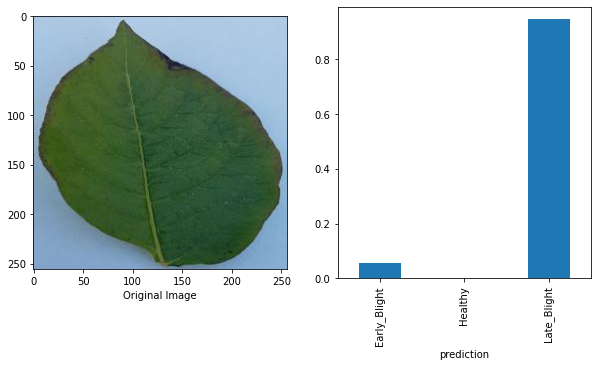

prediction made by model is : Late_Blight


In [ ]:
evaluation(img_path_late)

In [ ]:
model.save('potato_model.h5')